In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 막대그래프(Bar Plot) 개요

* 막대그래프는 성별, 연령대와 같은 범주형 데이터의 빈도수(Frequency)나 범주형 데이터의 수준(level) 별 합계 등에 사용됨.
* Python에서 막대그래프를 matplotlib, seaborn, pandas 라이브러리를 사용하여 시각화할 수 있음

## 방법1: Matplotlib

* Python에서 막대그래프를 만들 수 있는 방법은 여러가지 있으나 가장 간단한 방법 중 하나는 bar( ) 함수를 사용하는 것임.

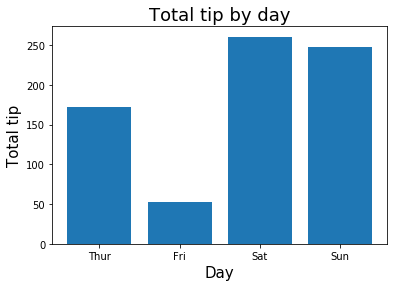

In [3]:
data = df.groupby("day")["tip"].sum()    # day 별 tip 합계 
label = data.index                       # label 설정 

fig, ax = plt.subplots()

ax.bar(label, data)                                # x축: label, y축: tip 합계
ax.set_title("Total tip by day", fontsize = 18)    # 제목 및 폰트 크기 설정 
ax.set_xlabel("Day", fontsize = 15)                # X축 및 폰트 크기 설정 
ax.set_ylabel("Total tip", fontsize = 15);         # Y축 및 폰트 크기 설정 

* 기본적으로 bar(  ) 함수는 수직 막대그래프를 만들게 되므로, 수평 막대그래프를 만들고 싶은 경우 경우는 barh(  ) 함수를 사용해야 함.

Text(0, 0.5, 'Day')

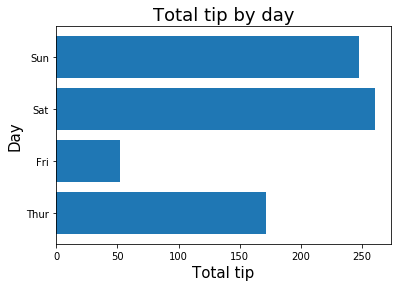

In [4]:
data = df.groupby("day")["tip"].sum()    # day 별 tip 합계 
label = data.index                       # label 설정 

fig, ax = plt.subplots()

ax.barh(label, data)                                # x축: label, y축: tip 합계
ax.set_title("Total tip by day", fontsize = 18)    # 제목 및 폰트 크기 설정 
ax.set_xlabel("Total tip", fontsize = 15);         # X축 및 폰트 크기 설정 
ax.set_ylabel("Day", fontsize = 15);                # Y축 및 폰트 크기 설정 

* color 인자는 막대 안을 채울 색상을 지정하며 기본값은 파란색(blue))이므로 필요에 따라 다양한 계열의 색상으로 지정할 수 있으며 그 방법은 다음과 같음.

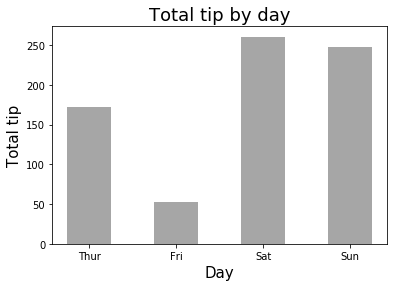

In [5]:
data = df.groupby("day")["tip"].sum()    # day 별 tip 합계 
label = data.index                       # label 설정 

fig, ax = plt.subplots()

ax.bar(label, data,                                
       width = 0.5,                                # 막대 너비(width) 설정 
       color = "gray",                             # 색상 설정
       alpha = 0.7)                                # 투명도 설정
ax.set_title("Total tip by day", fontsize = 18)    # 제목 및 폰트 크기 설정 
ax.set_xlabel("Day", fontsize = 15)                # X축 및 폰트 크기 설정 
ax.set_ylabel("Total tip", fontsize = 15);         # Y축 및 폰트 크기 설정 

* 막대그래프는 기본적으로 단일 막대 높이의 상대적 길이 차이를 통해 값이 크고 작음을 설명하지만, 필요에 따라서 아래와 같이 그룹 형태로 출력할 수도 있음.

In [6]:
data_m = df.groupby(["sex", "day"])["tip"].sum().loc["Male"]      
data_m

day
Thur     89.41
Fri      26.93
Sat     181.95
Sun     186.78
Name: tip, dtype: float64

In [7]:
data_f = df.groupby(["sex", "day"])["tip"].sum().loc["Female"]
data_f

day
Thur    82.42
Fri     25.03
Sat     78.45
Sun     60.61
Name: tip, dtype: float64

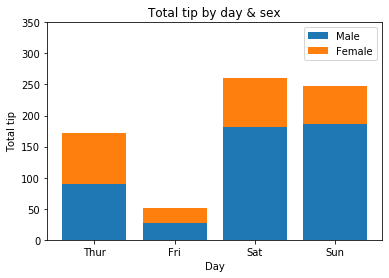

In [8]:
fig, ax = plt.subplots()

ax.bar(data_m.index, data_m, label = "Male")
ax.bar(data_f.index, data_f, bottom = data_m, label = "Female")
ax.set_title("Total tip by day & sex")
ax.set_xlabel("Day")
ax.set_ylabel("Total tip")
ax.set_ylim(0, 350)
ax.legend();

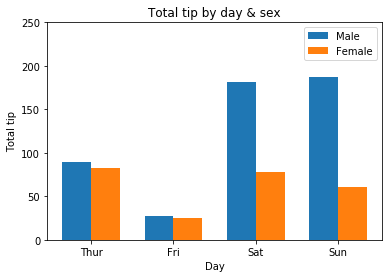

In [9]:
fig, ax = plt.subplots()

x = np.arange(4)
labels = ['Thur', 'Fri', 'Sat', 'Sun']
width = 0.35

ax.bar(x - width/2, data_m, width, label = "Male")
ax.bar(x + width/2, data_f, width, label = "Female")
ax.set_title("Total tip by day & sex")
ax.set_xlabel("Day")
ax.set_ylabel("Total tip")
ax.set_ylim(0, 250)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## 방법2: Seaborn

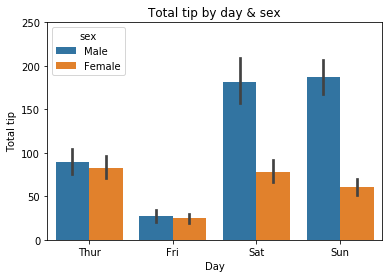

In [10]:
fig, ax = plt.subplots()

sns.barplot(x = "day", 
            y = "tip", 
            hue = "sex",
            data = df,
            estimator = np.sum);

ax.set_title("Total tip by day & sex")
ax.set_xlabel("Day")
ax.set_ylabel("Total tip")
ax.set_ylim(0, 250);